In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
import sys

In [85]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        linear = nn.Linear
        self.fc1 = linear(784, 300, bias=False)
        self.fc2 = linear(300, 100, bias=False)
        self.fc3 = linear(100, 10, bias=False)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = LeNet().to(device=device)
torch.save(model, 'LeNet.pt')


In [86]:
# Load model with paramaters
lenet = torch.load('LeNet.pt')
state_dict = lenet.state_dict()
# fc1_weight = np.array(state_dict['fc1.weight'])
# fc2_weight = np.array(state_dict['fc2.weight'])
# fc3_weight = np.array(state_dict['fc3.weight'])

fc1_weight = state_dict['fc1.weight'].cpu().numpy()
fc2_weight = state_dict['fc2.weight'].cpu().numpy()
fc3_weight = state_dict['fc3.weight'].cpu().numpy()


In [95]:
def log_softmax(vec):
    max_val = np.max(vec)
    exp = np.exp(vec - max_val)
    log_sum_exp = np.log(np.sum(exp))
    return vec - max_val - log_sum_exp

def normalize_array(vec):
    total = sum(vec)
    return np.apply_along_axis(lambda x: x/ total, axis=0, arr = vec)


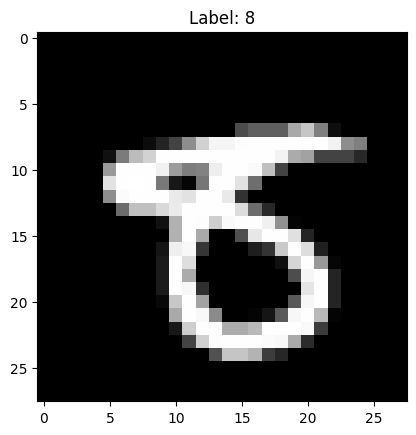

1.000000000000001


In [118]:
# get a test image
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_index = np.random.randint(0, x_train.shape[0])
image = x_train[image_index]
label = y_train[image_index]
plt.imshow(image, cmap='gray')
plt.title('Label: {}'.format(label))
plt.show()

flat_img = image.flatten()
# print(flat_img)
norm_flat_img = normalize_array(flat_img)
print(sum(norm_flat_img))


In [119]:
l1 = flat_img @ fc1_weight.T
relu_l1 = np.maximum(0, l1)

l2 = relu_l1 @ fc2_weight.T
relu_l2 = np.maximum(0, l2)

l3 = relu_l2 @ fc3_weight.T

soft_relu_l3 = log_softmax(l3)

probs = np.exp(soft_relu_l3)
sum_probs = np.sum(probs)
print(probs)
print(sum_probs)

print(np.argmax(probs))


[4.2080319e-14 8.0944762e-09 9.8894680e-01 2.2115247e-11 5.4885657e-08
 1.1649394e-09 1.1053193e-02 5.1964311e-15 1.0324910e-12 1.0969993e-08]
1.0
2
